In [70]:
#Podstawowe biblioteki użyte do eksploracji danych
import pandas as pd
import numpy  as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Biblioteki związane z transformacją danych i przygotowanie próbki treningowej i testowej
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Biblioteki zawierające gotowe implementacje modeli
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

#Biblioteki zawierające metryki oraz metody selekcji zmiennych
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report,make_scorer,roc_curve, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, f_regression, RFECV, f_classif, chi2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [4]:
# Mismatch columns
employment_duration = train['Home Ownership']
train['Home Ownership'] = train['Employment Duration']
train['Employment Duration'] = employment_duration

In [5]:
null_counts = train.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Applicatio

In [6]:
train.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [7]:
len_uniq_cust = len(train.ID.unique())
len_cust = len(train.ID)
print(f'All records: {len_cust}')
print(f'Unique clients: {len_uniq_cust}')

All records: 67463
Unique clients: 67463


# Categorical variables analysis

In [57]:
categorical_features = train.select_dtypes(include = ['object']).columns
categorical_features

Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')

In [58]:
# droping non-important features
categorical_features = categorical_features.drop(['Batch Enrolled', 'Sub Grade', 'Payment Plan', 'Application Type', 'Initial List Status', 'Loan Title'])

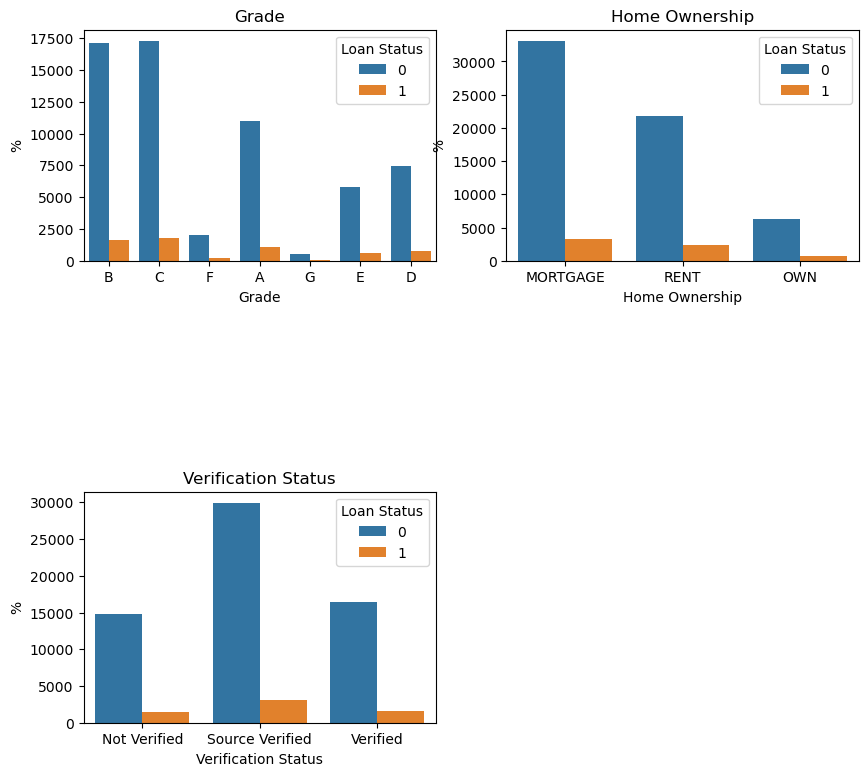

In [59]:
fig = plt.figure(figsize = (10,15))
for i, feature in enumerate(categorical_features):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(feature)
    (train[feature].value_counts()/len(train[feature])).plot.bar()
    #ax = sns.countplot(data=train,x=feature,hue='Loan Status')
    ax.set(ylabel = '%')
plt.subplots_adjust(hspace = 1, wspace = 0.2)
plt.show()

# Numerical variables analysis

In [11]:
numerical_features = train.select_dtypes(exclude = ['object']).columns
numerical_features

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Employment Duration', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [12]:
# droping non-important features
numerical_features = numerical_features.drop(['ID', 'Loan Status'])

# Outliers detection

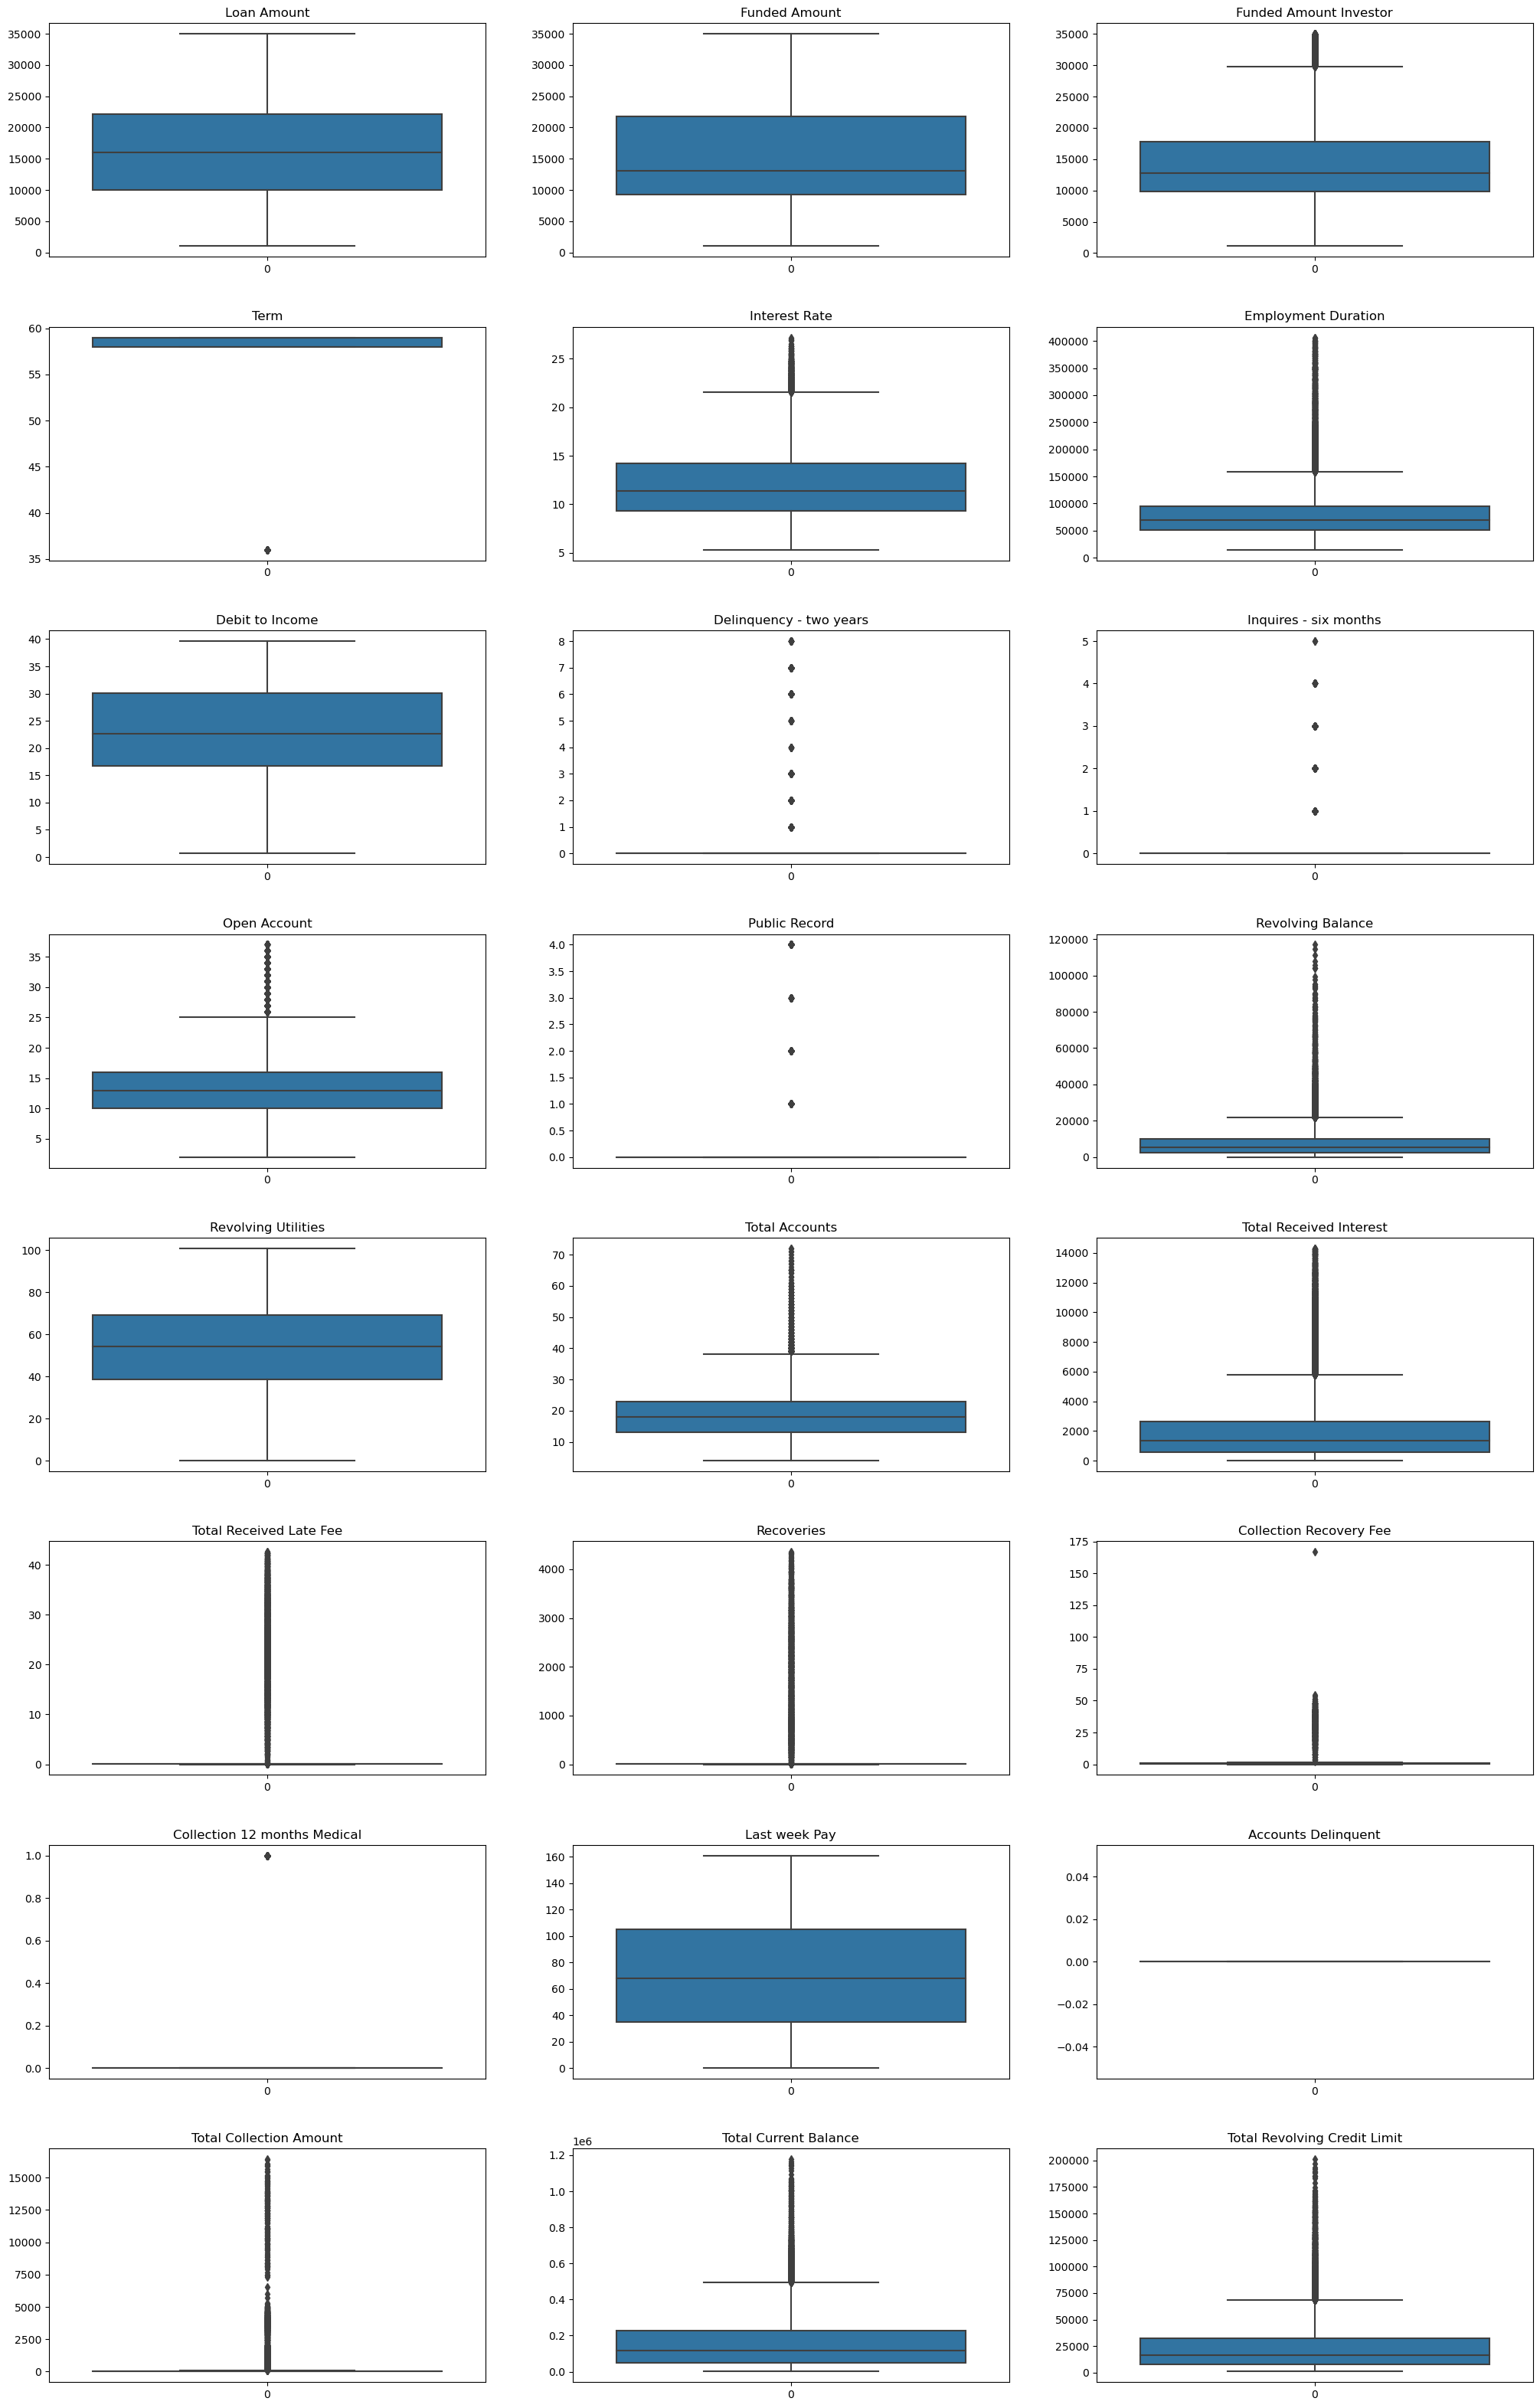

In [13]:
fig = plt.figure(figsize=(25,40))
for i , cecha in enumerate(numerical_features):
    ax = fig.add_subplot(8,3,i+1)
    ax.set_title(cecha)
    sns.boxplot(data=train[cecha], ax=ax)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.show()

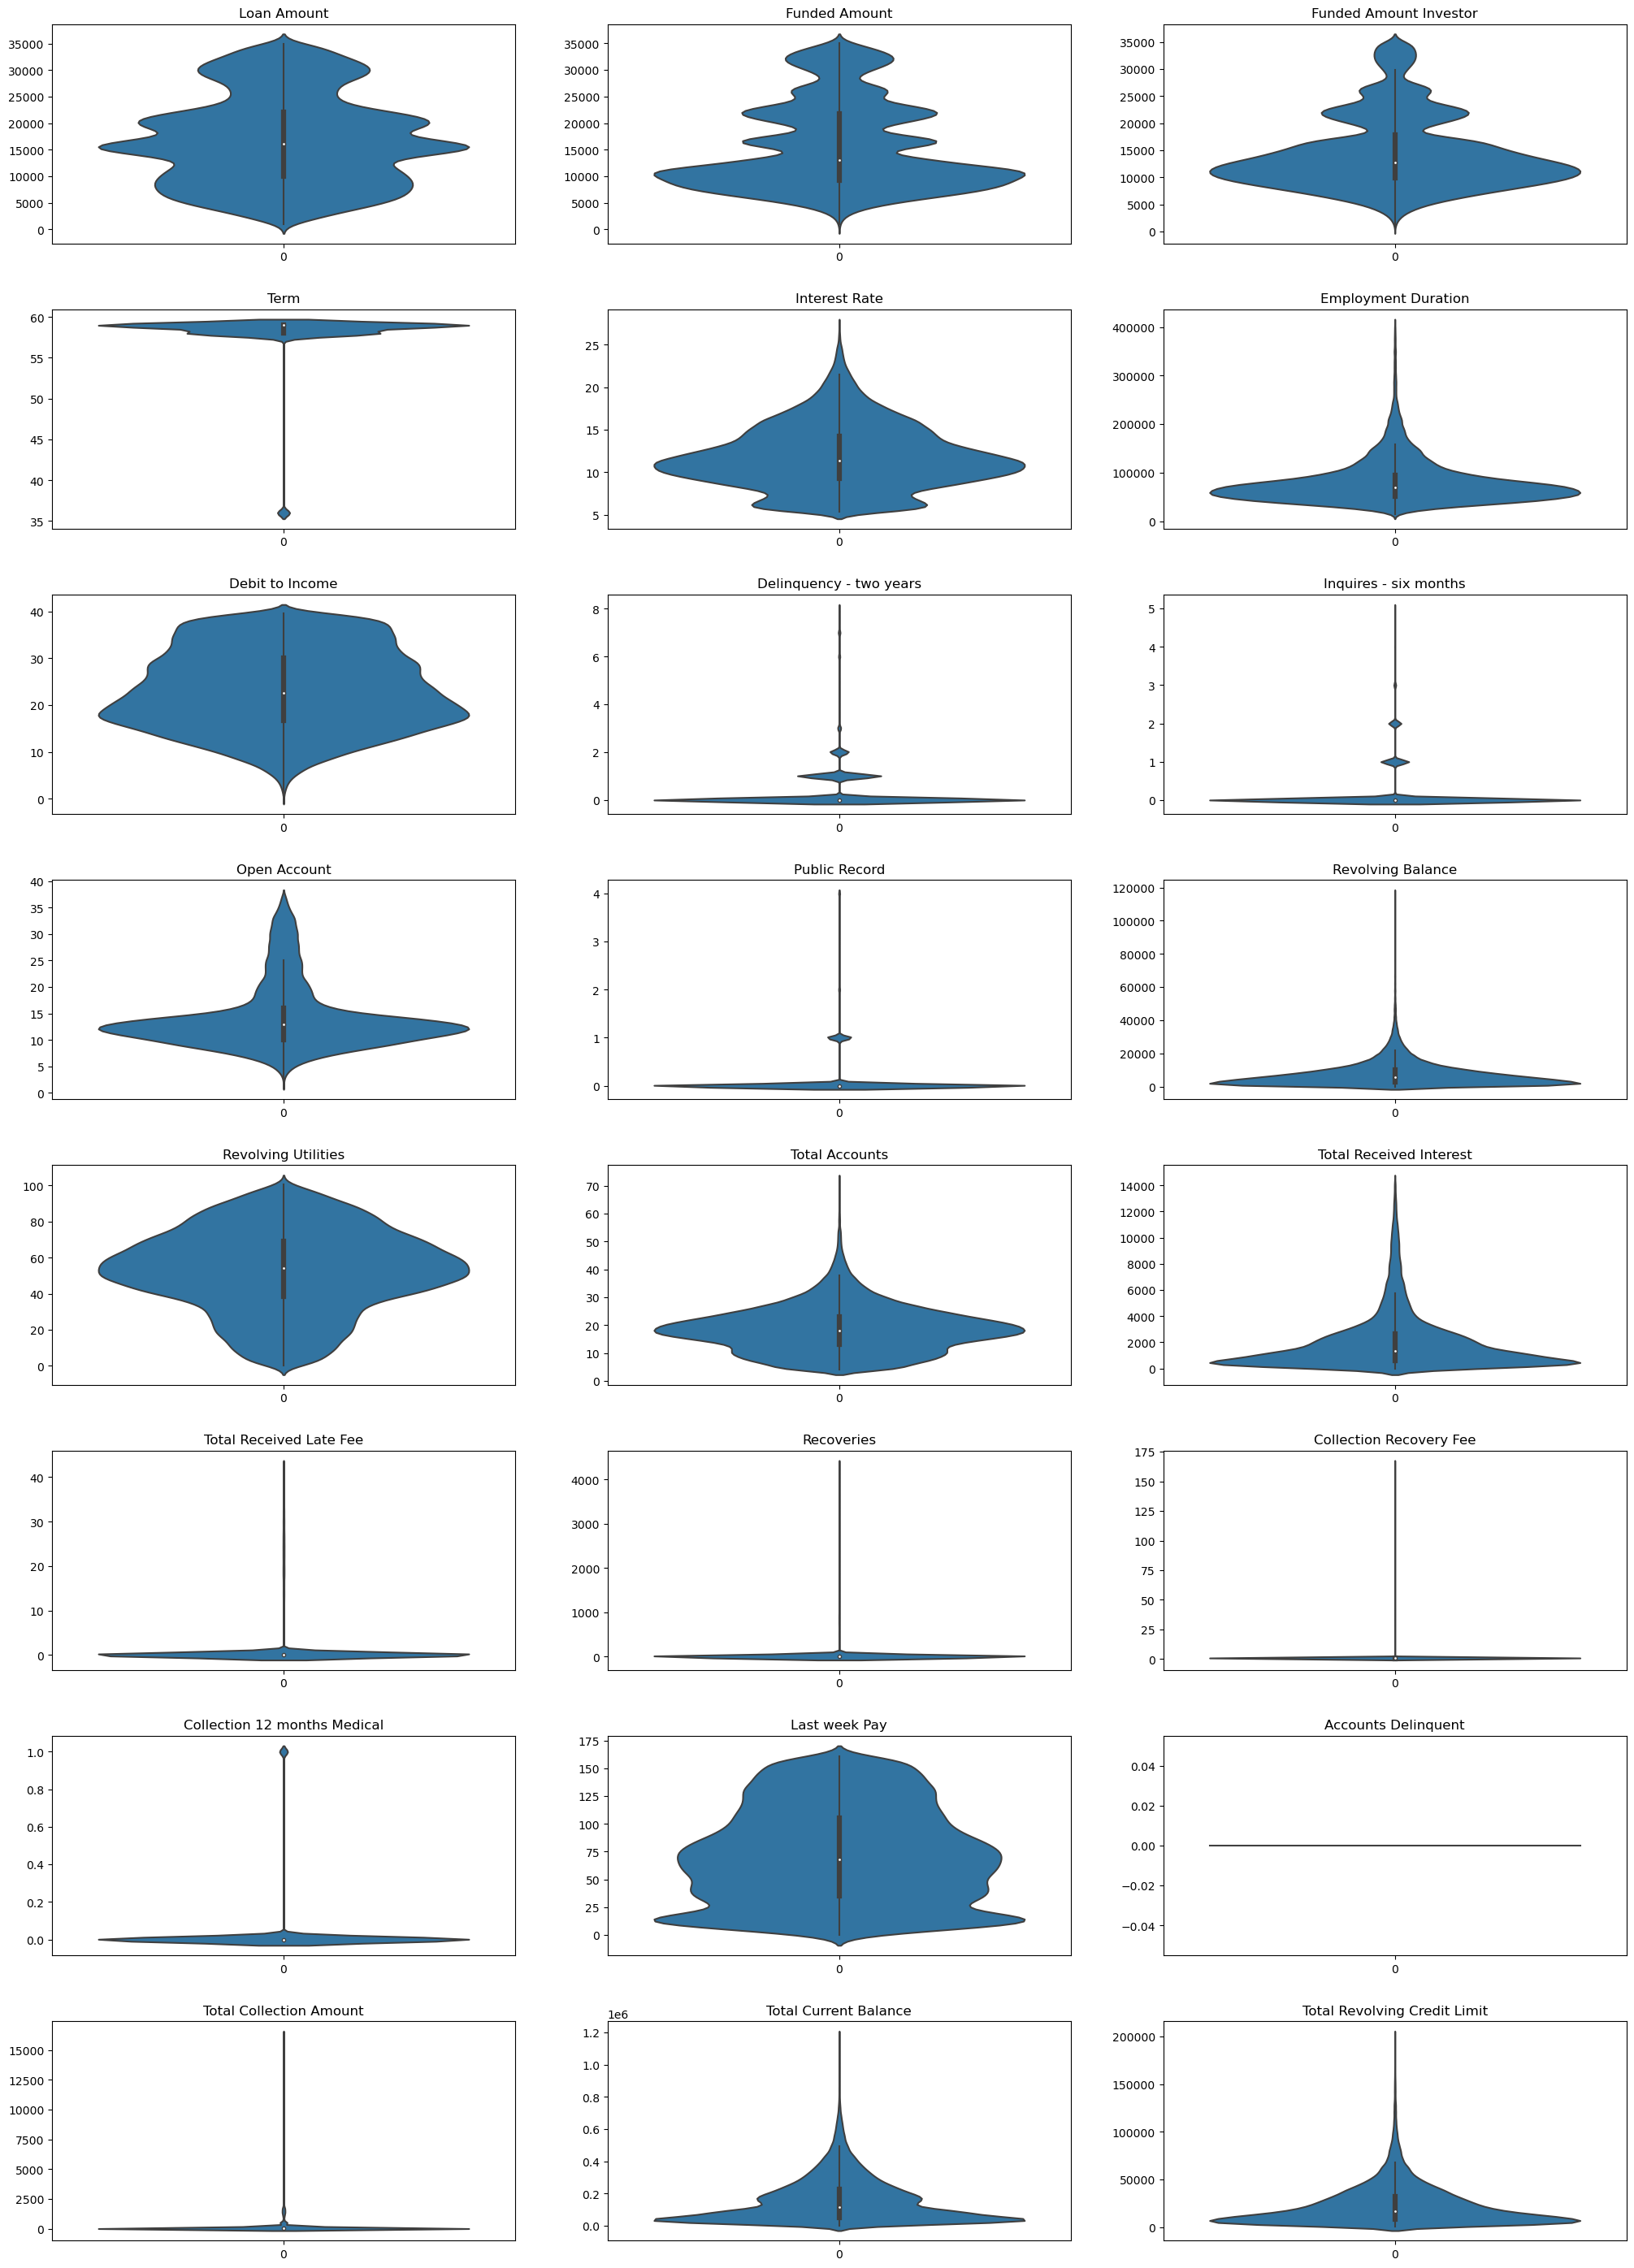

In [14]:
fig = plt.figure(figsize=(25,40))
for i , cecha in enumerate(numerical_features):
    ax = fig.add_subplot(9,3,i+1)
    ax.set_title(cecha)
    sns.violinplot(data=train[cecha], ax=ax)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.show()

In [15]:
indeks = []
count = []
avg = []
deviation = []
minimum = []
maximum = []
quant1 = []
median = []
quant3 = []
count_out = []
perc_out = []
count_out_z = []

for feature in numerical_features:
    indeks.append(feature)
    count.append(train[feature].count())
    avg.append(train[feature].mean())
    deviation.append(train[feature].std())
    median.append(train[feature].median())
    minimum.append(train[feature].min())
    maximum.append(train[feature].max())
    q1 = train[feature].quantile(0.25)
    q3 = train[feature].quantile(0.75)
    iqr = q3 - q1
    quant1.append(q1)
    quant3.append(q3)
    count_out.append(sum(train[feature] > q3 + 1.5*iqr) + sum(train[feature] < q3 - 1.5*iqr))
    perc_out.append((sum(train[feature] > q3 + 1.5*iqr) + sum(train[feature] < q3 - 1.5*iqr)) / train[feature].count())

tabela=pd.DataFrame({'Ilość':count,"Średnia":avg,"Odchylenie":deviation,"Minimum":minimum,"Maksimum":maximum,
                    "I kwartyl":quant1,"Mediana":median,"III kwartyl":quant3, "Outliers rozstęp":count_out,
                    "Udział outliersów":perc_out}, index=indeks)

tabela

,Ilość,Średnia,Odchylenie,Minimum,Maksimum,I kwartyl,Mediana,III kwartyl,Outliers rozstęp,Udział outliersów
Loan Amount,67463,16848.902776,8367.865726,1014.000000,3.500000e+04,10012.000000,16073.000000,22106.000000,2491,0.036924
Funded Amount,67463,15770.599114,8150.992662,1014.000000,3.499900e+04,9266.500000,13042.000000,21793.000000,193,0.002861
Funded Amount Investor,67463,14621.799323,6785.345170,1114.590204,3.499975e+04,9831.684984,12793.682170,17807.594120,5546,0.082208
Term,67463,58.173814,3.327441,36.000000,5.900000e+01,58.000000,59.000000,59.000000,1457,0.021597
Interest Rate,67463,11.846258,3.718629,5.320006,2.718235e+01,9.297147,11.377696,14.193533,6989,0.103598
Employment Duration,67463,80541.502522,45029.120366,14573.537170,4.065615e+05,51689.843335,69335.832680,94623.322785,6240,0.092495
Debit to Income,67463,23.299241,8.451824,0.675299,3.962986e+01,16.756416,22.656658,30.048400,3271,0.048486
Delinquency - two years,67463,0.327127,0.800888,0.000000,8.000000e+00,0.000000,0.000000,0.000000,15409,0.228407
Inquires - six months,67463,0.145754,0.473291,0.000000,5.000000e+00,0.000000,0.000000,0.000000,6977,0.103420
Open Account,67463,14.266561,6.225060,2.000000,3.700000e+01,10.000000,13.000000,16.000000,7349,0.108934


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


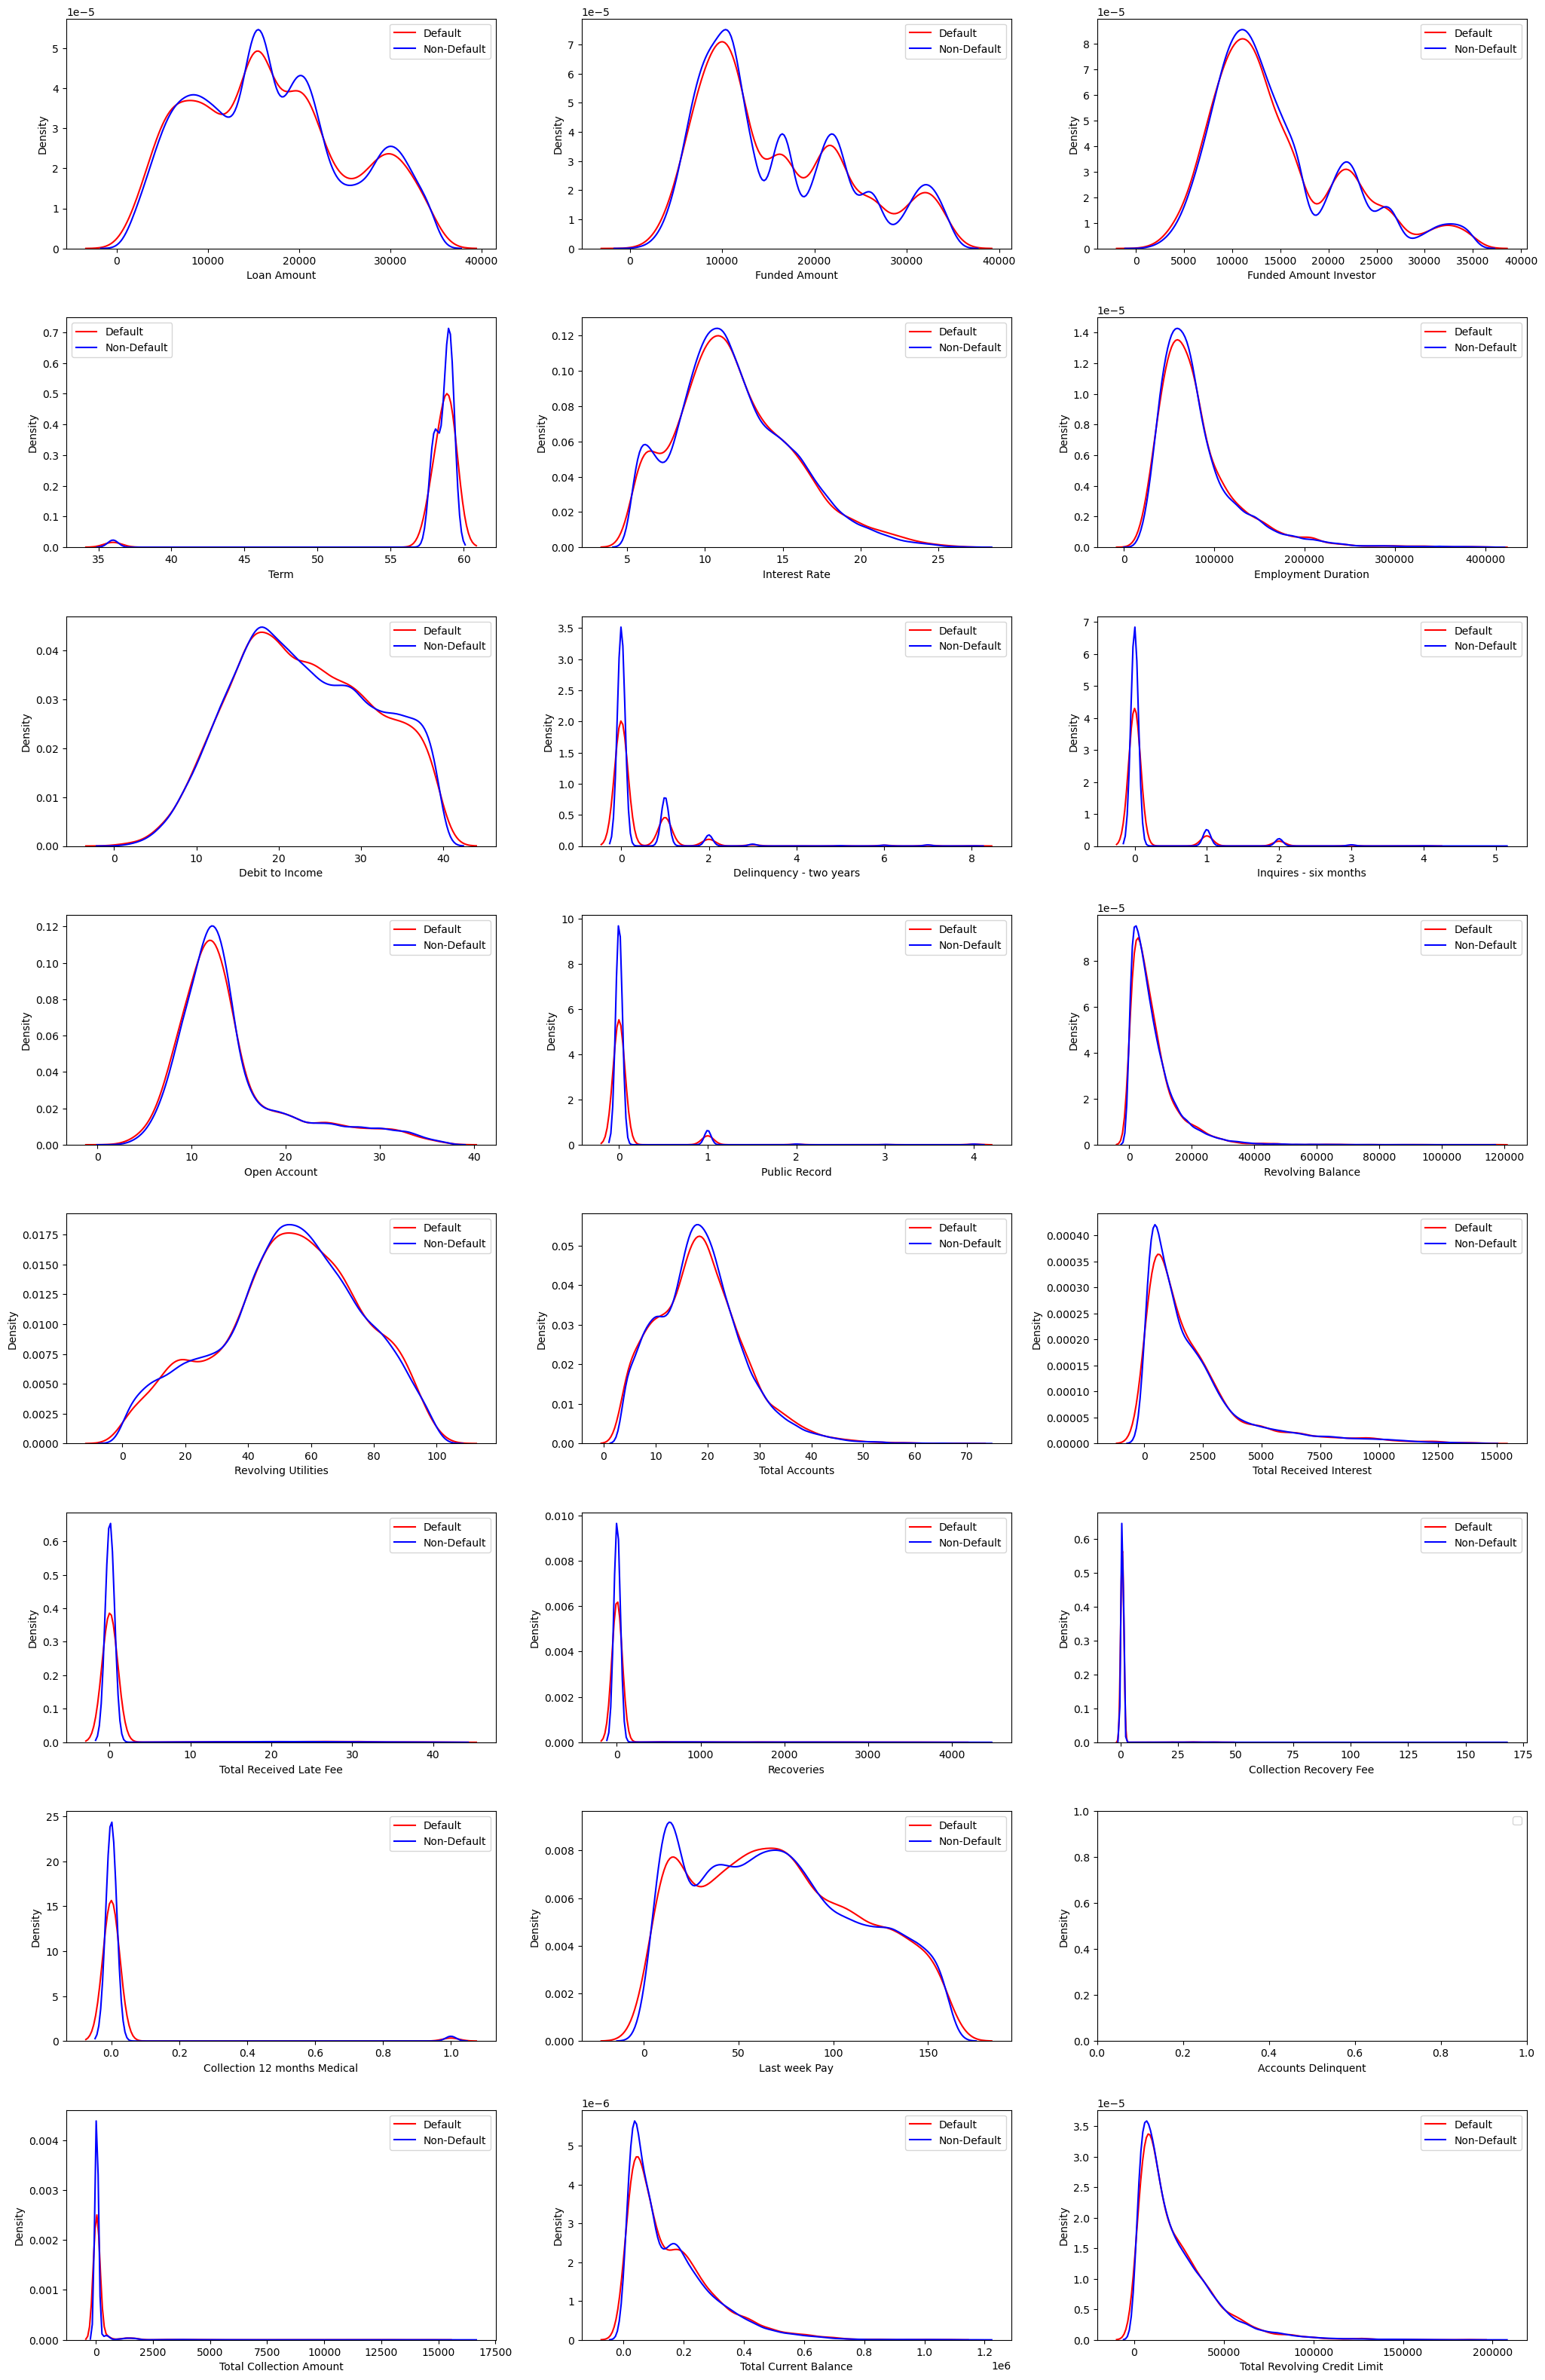

In [16]:
fig = plt.figure(figsize = (25, 40))
for i, feature in enumerate(numerical_features):
    ax = fig.add_subplot(8, 3, i+1)
    sns.distplot(train.loc[train["Loan Status"] == 1, feature], hist = False, ax = ax, color = "red", label = "Default")
    sns.distplot(train.loc[train["Loan Status"] == 0, feature], hist = False, ax = ax, color = "blue", label = "Non-Default")
    plt.legend()
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.show()

In [18]:
train2 = train.copy()

In [52]:
class TransformerWOE(TransformerMixin,BaseEstimator):
    
    def __init__(self, features):
        self.features=features

            
    def fit(self,X,y):
        X_new=pd.concat([X, y], axis=1)
        
        target_name=X_new.columns[len(X_new.columns)-1]
        
        self.lista_woe_mapping=[]
        for feature in self.features:
            woe_mapping=dict()
            for x in X_new[feature].unique():
                non_event=len(X_new[X_new[feature]==x])-sum(X_new[X_new[feature]==x][target_name])
                non_event_total=sum(y==0)
                non_event_perc=non_event/non_event_total           
                event=sum(X_new[X_new[feature]==x][target_name])
                event_total=sum(y==1)
                event_perc=event/event_total
                woe=np.log(non_event_perc/event_perc)
                woe_mapping[x]=woe   
            self.lista_woe_mapping.append(woe_mapping)
        return self
            
    
    def transform(self,X):
        i=0
        for feature in self.features:
            X[feature]=X[feature].map(self.lista_woe_mapping[i])
            i=i+1
        return X

In [22]:
class TransformerLowCat(TransformerMixin,BaseEstimator):
    
    def __init__(self,cechy):
        self.cechy=cechy

            
    def fit(self, X, y=None):
        self.lista_kateg=[]
        for cecha in self.cechy:
            self.lista_kateg.append([kat for kat in X[cecha].unique() if len(X[X[cecha]==kat])/len(X)>=0.05])
        return self
            
    
    def transform(self,X):
        i=0
        for cecha in self.cechy:
            X.loc[~X[cecha].isin(self.lista_kateg[i]),cecha]='Inne'
            i=1+i
        return X

In [21]:
class TransformerFeature(TransformerMixin,BaseEstimator):
    
    def __init__(self, features):
        self.features=features

    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        return X[self.features]

In [24]:
X, y = train.drop(['Loan Status'],axis=1), train['Loan Status']
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=2423)

In [37]:
categorical_features

Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')

In [63]:
pipe1 = FeatureUnion([
    ('categorical', make_pipeline(TransformerFeature(list(categorical_features)),
                                  OneHotEncoder(sparse = False, handle_unknown='ignore'))),
    ('numerical', make_pipeline(TransformerFeature(list(numerical_features)),
                                RobustScaler()))
])

In [66]:
X_train_OHE_Rob=pd.DataFrame(pipe1.fit_transform(X_train,y_train))
X_test_OHE_Rob=pd.DataFrame(pipe1.fit_transform(X_test,y_test))

In [69]:
#Sprawdzenie ilości defaultów w próbce treningowej i testowej:
print(f"Defualt rate in train set: {round(y_train.mean()*100,4)}%")
print(f"Defualt rate in test set: {round(y_test.mean()*100,4)}%")

Defualt rate in train set: 9.2385%
Defualt rate in test set: 9.3011%


In [71]:
nazwy= ["Regresja logistyczna", "Lasy losowe", "XGBoost", "Bagging (naiwny bayes)", "Bagging (drzewo decyzyjne)"]

modele=[LogisticRegression(), RandomForestClassifier(),
        XGBClassifier(verbosity = 0), BaggingClassifier(base_estimator=GaussianNB()),
        BaggingClassifier(DecisionTreeClassifier())]


accuracy_train = []
accuracy_test = []
auc_train = []
auc_test = []
f1_train = []
f1_test = []
pot_profit_train = []
pot_profit_test = []
false_positive = []
false_negative = []
true_positive = []
recall = []
precision = []

for model in modele:
    model.fit(X_train_OHE_Rob,y_train)
    accuracy_train.append(accuracy_score(y_pred=model.predict(X_train_OHE_Rob),y_true=y_train))
    accuracy_test.append(accuracy_score(y_pred=model.predict(X_test_OHE_Rob),y_true=y_test))
    auc_train.append(roc_auc_score(y_score=model.predict_proba(X_train_OHE_Rob)[:,1],y_true=y_train))
    auc_test.append(roc_auc_score(y_score=model.predict_proba(X_test_OHE_Rob)[:,1],y_true=y_test))
    f1_train.append(f1_score(y_pred=model.predict(X_train_OHE_Rob),y_true=y_train))
    f1_test.append(f1_score(y_pred=model.predict(X_test_OHE_Rob),y_true=y_test))


podsumowanie=pd.DataFrame({"Acc_train":accuracy_train, "Acc_test":accuracy_test,
                           "AUC_train":auc_train, "AUC_test":auc_test,
                           "F1_train":f1_train, "F1_test":f1_test}, index=nazwy)
podsumowanie

,Acc_train,Acc_test,AUC_train,AUC_test,F1_train,F1_test
Regresja logistyczna,0.907615,0.906989,0.525206,0.509350,0.000000,0.000000
Lasy losowe,0.999907,0.906989,1.000000,0.508927,0.999498,0.000000
XGBoost,0.916102,0.906025,0.937602,0.529520,0.168259,0.000000
Bagging (naiwny bayes),0.875134,0.873638,0.527996,0.518363,0.072146,0.065753
Bagging (drzewo decyzyjne),0.982324,0.904988,0.999395,0.505259,0.894212,0.001558
